# Clusterização da base de whisky

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import sys
#!{sys.executable} -m pip install -U scikit-learn

In [59]:
# Carregando odataset do um diretório do notebook
cotacoes = pd.read_csv('cotacoes-dolar-bovespa.csv') # Agora o dataset iris é um Pandas DataFrame

# uma primeir olhada nos dados
cotacoes.head(10)#O método head(n) permite que você veja o começo de um dataframe, o parêtro n define o núemro de linhas serem exibidas

,dia,dolarFechamento,dolarAbertura,dolarMaxima,dolarMinima,dolarVariacaoPercentual,bovespaFechamento,bovespaMinima,bovespaMaxima,bovespaVariacao,bovespaVariacaoPercentual,acao
0,1/7/2019,3.84,3.84,3.85,3.81,-0.30,101339.68,100973.48,102431.61,372.48,0.37,compra
1,2/7/2019,3.85,3.84,3.88,3.82,0.13,100605.17,100072.77,101564.53,-734.51,-0.72,nada
2,3/7/2019,3.83,3.85,3.88,0.38,-0.48,102043.11,100451.36,102176.96,1437.94,1.43,compra
3,4/7/2019,3.80,3.83,3.83,3.78,-0.68,103636.17,102046.55,104021.60,1593.06,1.56,compra
4,5/7/2019,3.82,3.80,3.84,3.80,0.55,104089.47,102621.70,104175.90,453.30,0.44,vende
5,8/7/2019,3.81,0.38,3.82,3.80,-0.39,104530.22,103987.99,104679.30,440.75,0.42,compra
6,10/7/2019,3.75,3.79,3.79,3.75,-1.21,105817.06,104536.70,106650.12,1286.84,1.23,compra
7,11/7/2019,3.76,3.75,3.77,3.73,0.01,105146.44,104813.51,105885.50,-670.62,-0.63,nada
8,12/7/2019,3.74,3.76,3.76,3.73,-0.47,103905.99,103903.06,105730.54,-1240.45,-1.18,compra
9,15/7/2019,3.76,3.74,3.76,3.73,0.52,103802.69,103494.84,104577.91,-103.30,-0.10,nada


In [60]:
# confirmando o número de amostras e de cada ação
print (cotacoes['acao'].count())
print (cotacoes['acao'].value_counts())

211
compra    88
nada      77
vende     46
Name: acao, dtype: int64


In [61]:
# Vamos ver as colunas do dataset
cotacoes.columns.tolist()

['dia',
 'dolarFechamento',
 'dolarAbertura',
 'dolarMaxima',
 'dolarMinima',
 'dolarVariacaoPercentual',
 'bovespaFechamento',
 'bovespaMinima',
 'bovespaMaxima',
 'bovespaVariacao',
 'bovespaVariacaoPercentual',
 'acao']

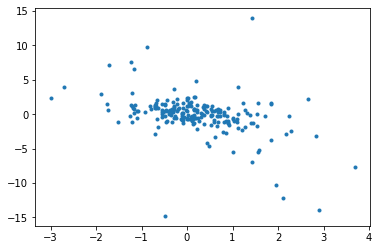

In [62]:

# criando um scatter plot de atributos com o Matplotib 
plt.plot(cotacoes['dolarVariacaoPercentual'],cotacoes["bovespaVariacaoPercentual"],marker='.',linestyle='none')
plt.show()

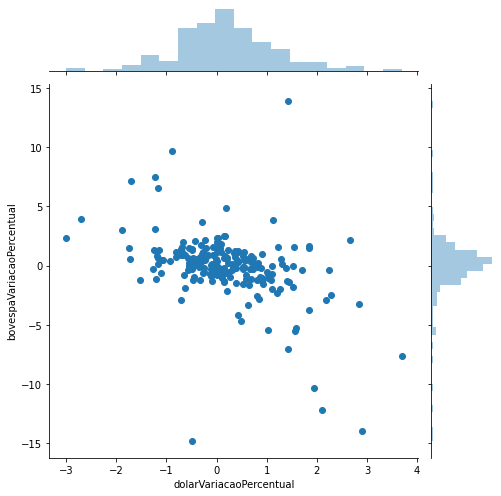

In [63]:
sns.jointplot(x="dolarVariacaoPercentual", y="bovespaVariacaoPercentual", data=cotacoes, size=7)

In [64]:
# cotacoes.info()# Calculando correlação entre as variáveis do dataset
cotacoes.corr().style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,dolarFechamento,dolarAbertura,dolarMaxima,dolarMinima,dolarVariacaoPercentual,bovespaFechamento,bovespaMinima,bovespaMaxima,bovespaVariacao,bovespaVariacaoPercentual
dolarFechamento,1.0,0.15,0.086,0.069,0.18,-0.22,-0.21,-0.21,-0.085,-0.063
dolarAbertura,0.15,1.0,0.0053,0.17,0.077,-0.16,-0.16,-0.15,-0.14,-0.14
dolarMaxima,0.086,0.0053,1.0,0.046,-0.016,-0.099,-0.1,-0.083,-0.058,-0.039
dolarMinima,0.069,0.17,0.046,1.0,0.1,-0.13,-0.15,-0.12,0.035,0.054
dolarVariacaoPercentual,0.18,0.077,-0.016,0.1,1.0,-0.15,-0.13,-0.1,-0.44,-0.42
bovespaFechamento,-0.22,-0.16,-0.099,-0.13,-0.15,1.0,1.0,0.99,0.13,0.1
bovespaMinima,-0.21,-0.16,-0.1,-0.15,-0.13,1.0,1.0,0.99,0.085,0.059
bovespaMaxima,-0.21,-0.15,-0.083,-0.12,-0.1,0.99,0.99,1.0,0.018,-0.00026
bovespaVariacao,-0.085,-0.14,-0.058,0.035,-0.44,0.13,0.085,0.018,1.0,0.99
bovespaVariacaoPercentual,-0.063,-0.14,-0.039,0.054,-0.42,0.1,0.059,-0.00026,0.99,1.0


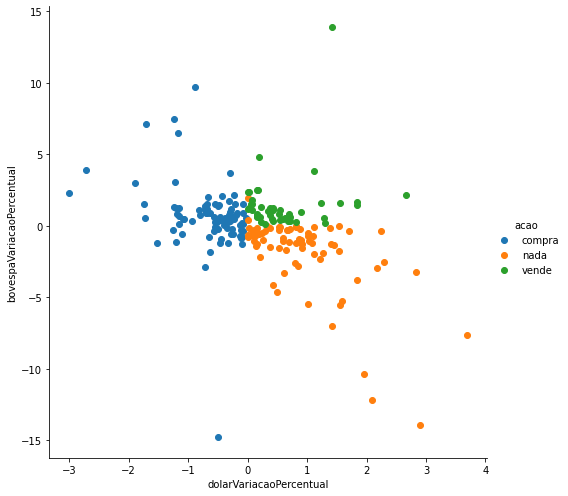

In [65]:
# usando FacetGrid do Seaborn para criar uma scatterplot colorida conforme o atributo species
sns.FacetGrid(cotacoes, hue="acao", size=7) \
   .map(plt.scatter, "dolarVariacaoPercentual", "bovespaVariacaoPercentual") \
   .add_legend()

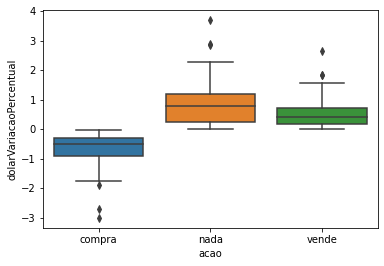

In [66]:

# Um boxplot de atributos  com o seaborn é bem útil para comparar atributos em grupos de interesse
sns.boxplot(x="acao", y="dolarVariacaoPercentual", data=cotacoes);

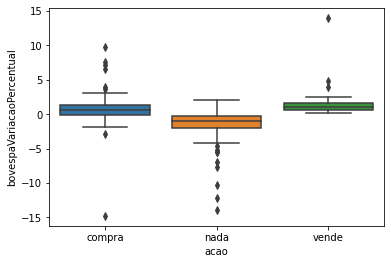

In [67]:

sns.boxplot(x="acao", y="bovespaVariacaoPercentual", data=cotacoes)

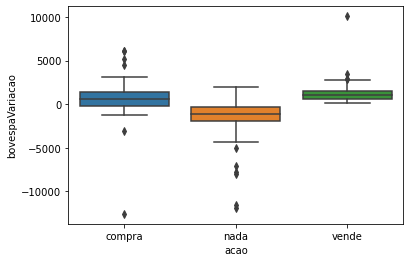

In [68]:

sns.boxplot(x="acao", y="bovespaVariacao", data=cotacoes)

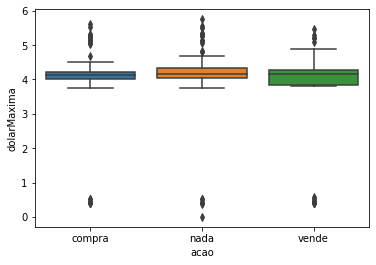

In [69]:
sns.boxplot(x="acao", y="dolarMaxima", data=cotacoes)

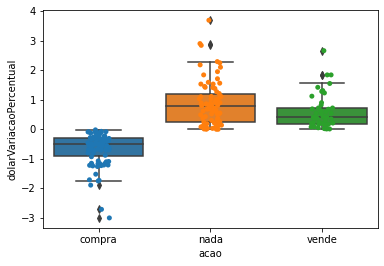

In [70]:
# usando a função striplot do Seaborn adiciona uma camada de pontos individuais
# setting jitter = True garante que nem todos os pontos caiam na mesma linha
# Salvar os eixos resultantes como eixo sempre faz com que o gráfico resultante seja mostrado
# em cima dos eixos anteriores (isso é uma coisa interessante de aprender :)
ax = sns.boxplot(x="acao", y="dolarVariacaoPercentual", data=cotacoes)
ax = sns.stripplot(x="acao", y="dolarVariacaoPercentual", data=cotacoes, jitter=True, edgecolor="gray")

In [71]:
#ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

NameError: name 'iris' is not defined

In [72]:
ax = sns.stripplot(x="Species", y="PetalWidthCm", data=iris, jitter=True, edgecolor="gray")
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

NameError: name 'iris' is not defined

In [73]:
# Um gráfico de violino combina os benefícios dos dois gráficos anteriores e os simplifica. 
# As regiões mais densas dos dados são mais gordas e mais esparsas em um gráfico de violino

sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

NameError: name 'iris' is not defined

In [74]:
# Divida o conjunto de dados da íris em um trem e teste
dfX = cotacoes[['dolarMaxima','dolarVariacaoPercentual','bovespaMaxima','bovespaVariacaoPercentual']]
dfy = cotacoes['acao']

In [75]:
X = dfX.values
y=dfy.values

In [76]:
# importar o módulo para separar o conjunto de dados em conjuntos de teste e treinamento.
from sklearn.model_selection import train_test_split
# Divida o conjunto de dados da íris em um trem e teste
X_train, X_test, y_train, y_test=train_test_split(X, y,random_state=0,train_size=0.75)

In [77]:
# Vamos importar o módulo KMeans
from sklearn.cluster import KMeans

In [78]:
# importar o módulo para separar o conjunto de dados em conjuntos de teste e treinamento.
from sklearn.model_selection import train_test_split

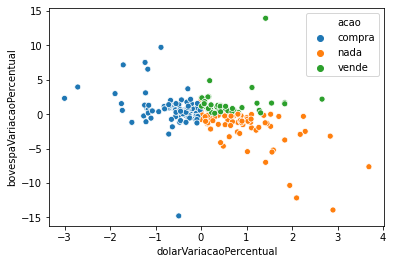

In [79]:
sns.scatterplot(dfX.dolarVariacaoPercentual,dfX.bovespaVariacaoPercentual,hue=dfy)

In [80]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [81]:
print(km.cluster_centers_)

[[ 3.69136364e+00  1.44431818e-01  1.04324453e+05 -1.17613636e-01]
 [ 4.22555556e+00  3.87777778e-01  7.77433993e+04 -3.98148148e-01]
 [ 3.92604651e+00  1.09302326e-02  1.15645736e+05  1.58139535e-02]]


In [82]:
centers = pd.DataFrame(km.cluster_centers_, columns=dfX.columns)

In [83]:
centers

,dolarMaxima,dolarVariacaoPercentual,bovespaMaxima,bovespaVariacaoPercentual
0,3.691364,0.144432,104324.453295,-0.117614
1,4.225556,0.387778,77743.399259,-0.398148
2,3.926047,0.010930,115645.736047,0.015814


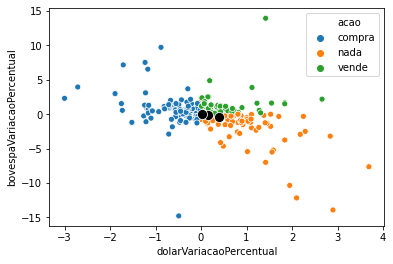

In [84]:
sns.scatterplot(dfX.dolarVariacaoPercentual,dfX.bovespaVariacaoPercentual,hue=dfy)
sns.scatterplot(centers.dolarVariacaoPercentual, centers.bovespaVariacaoPercentual, color = 'k', s=100)

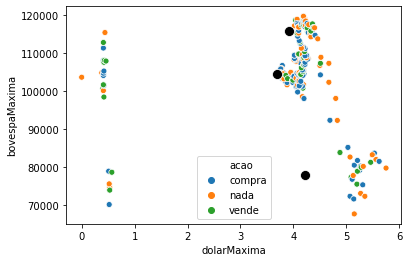

In [85]:
sns.scatterplot(dfX.dolarMaxima,dfX.bovespaMaxima,hue=dfy)
sns.scatterplot(centers.dolarMaxima, centers.bovespaMaxima, color = 'k', s=100)

In [86]:
y_hat = km.predict(X_test)

In [87]:
results = pd.DataFrame([y_test,y_hat]);
results = results.T
results.columns = ['y_test','y_hat']

In [88]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

## Plotagem o cluster hierárquico como um dendograma.
O dendrograma ilustra como cada cluster é composto desenhando um link em forma de U entre um cluster não singleton e seus filhos. A parte superior do link em U indica uma mesclagem de cluster. As duas pernas do link em U indicam quais clusters foram mesclados. O comprimento das duas pernas do link em U representa a distância entre os clusters filhos. É também a distância copenética entre observações originais nos dois grupos de crianças.

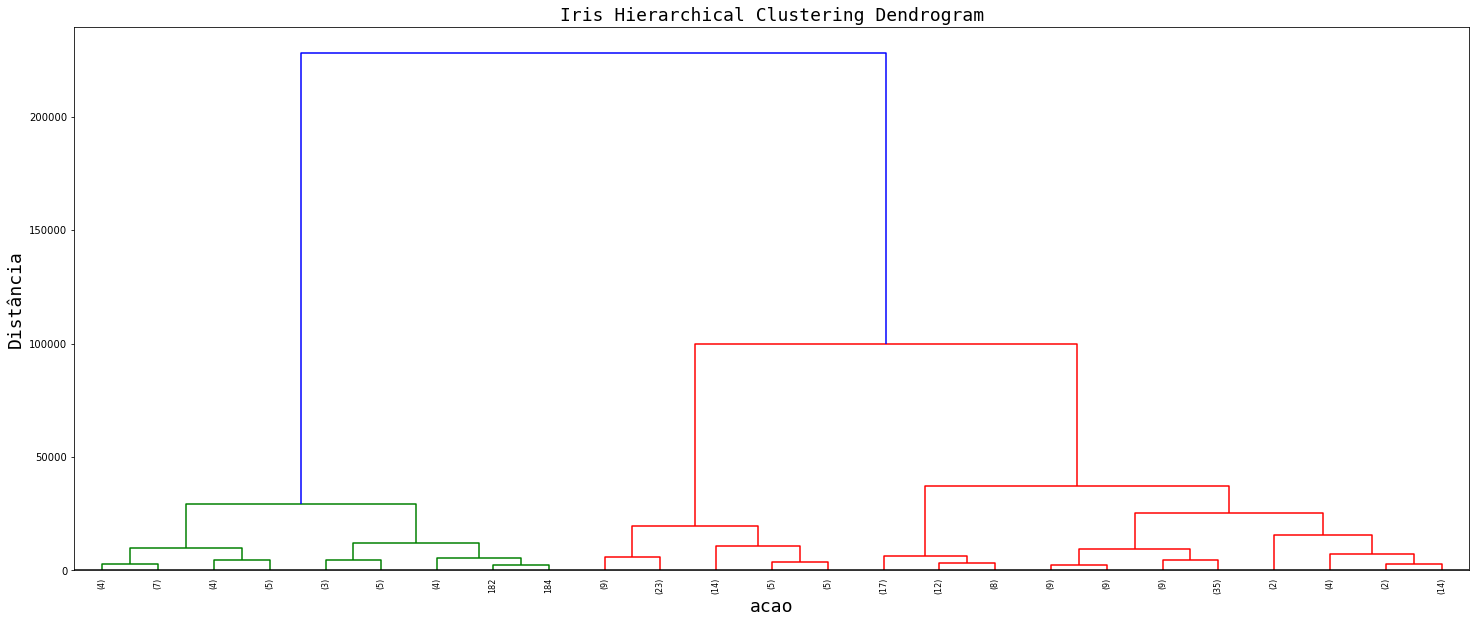

In [89]:
# generate the linkage matrix
Z = linkage(dfX, 'ward')

# set cut-off to 150
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
fontparams = {'size':18,'fontweight':'light',
              'family':'monospace','style':'normal'}
plt.title('Iris Hierarchical Clustering Dendrogram', fontparams)
plt.xlabel('acao', fontparams)
plt.ylabel('Distância', fontparams)
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)

plt.axhline(y=max_d, c='k')
plt.show()